Connected to cmri (Python 3.9.0)

In [ ]:
# This import is necessary to run the code cell-by-cell
try:
    from lab04_solution import *

    print("lab04_solution is being used")

except ImportError:
    from lab04 import *

    print("lab04 is being used")

lab04_solution is being used


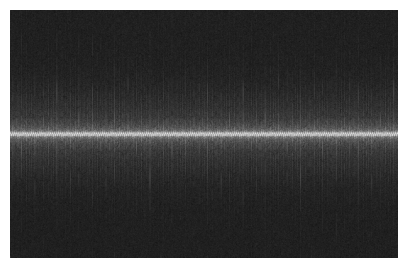

In [ ]:
op = Lab04_op()
k_radial = op.load_kdata()
utils.imshow([k_radial], norm=0.3)

In [ ]:
k_radial.shape

(384, 600)

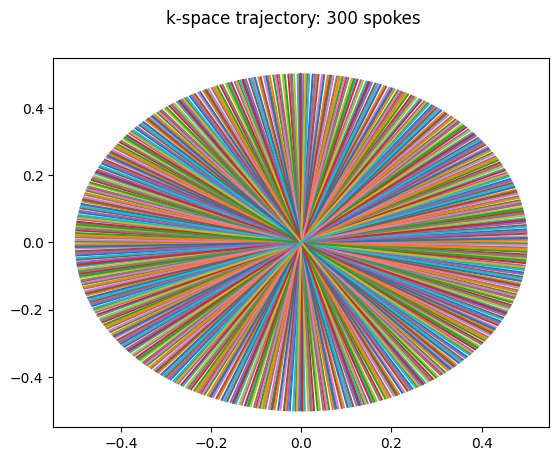

In [ ]:
# Task 1.	Radial sampling pattern:
## b.
traj = op.get_traj(k_radial)
utils.plot_spokes(traj, 300)

In [ ]:
## c.
spokes_nyq = op.calc_nyquist(k_radial)
print(f"{spokes_nyq} spokes are necessary to sample at/above Nyquist rate.")

604 spokes are necessary to sample at/above Nyquist rate.


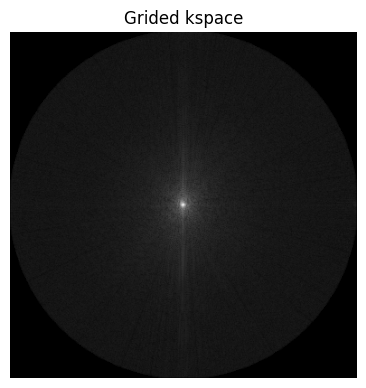

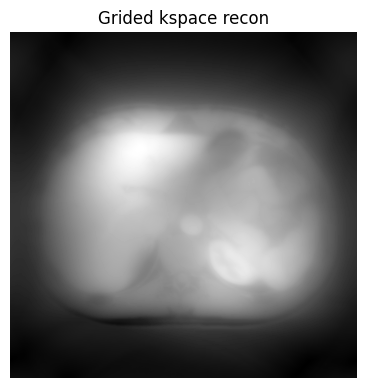

In [ ]:
# Task 2.	Basic gridding reconstruction:
k_cart = op.grid_radial(k_radial, traj)
k_cart_recon = utils.ifft2c(k_cart)

utils.imshow([k_cart], titles=["Grided kspace"], norm=0.2)
utils.imshow([k_cart_recon], titles=["Grided kspace recon"])

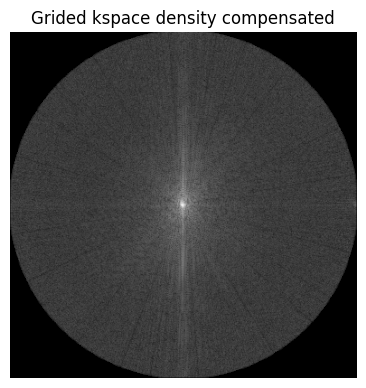

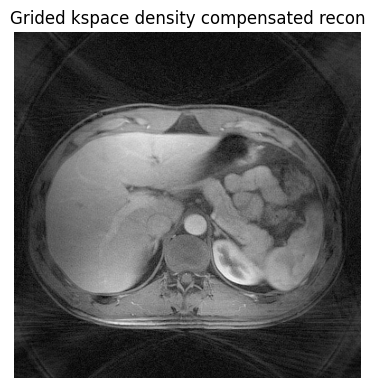

In [ ]:
# Task 3.	Density compensation:
k_cart_ds = op.grid_radial_ds(k_radial, traj)
k_cart_ds_recon = utils.ifft2c(k_cart_ds)

utils.imshow([k_cart_ds], titles=["Grided kspace density compensated"], norm=0.2)
utils.imshow([k_cart_ds_recon], titles=["Grided kspace density compensated recon"], norm=0.7)

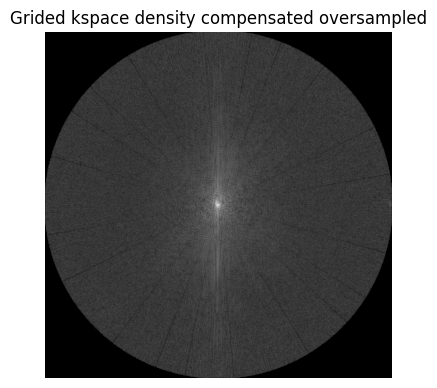

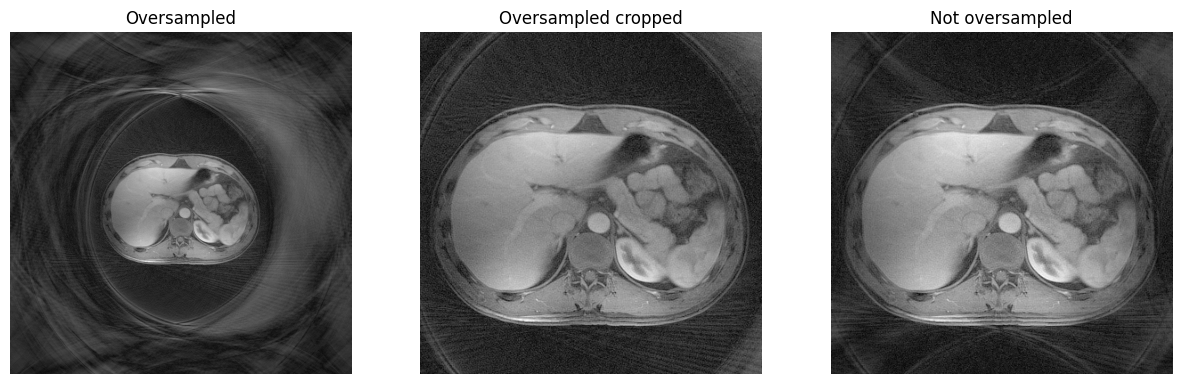

In [ ]:
# Task 4.	Oversampling
k_cart_ds_os = op.grid_radial_ds_os(k_radial, traj, 2)
k_cart_ds_os_recon = utils.ifft2c(k_cart_ds_os)
k_cart_ds_os_recon_cropped = op.center_crop_2d(k_cart_ds_os_recon, (k_radial.shape[0], k_radial.shape[0]))

utils.imshow(
    [k_cart_ds_os],
    titles=["Grided kspace density compensated oversampled"],
    norm=0.2,
)
utils.imshow(
    [k_cart_ds_os_recon, k_cart_ds_os_recon_cropped, k_cart_ds_recon],
    titles=["Oversampled", "Oversampled cropped", "Not oversampled"],
    norm=0.6,
)

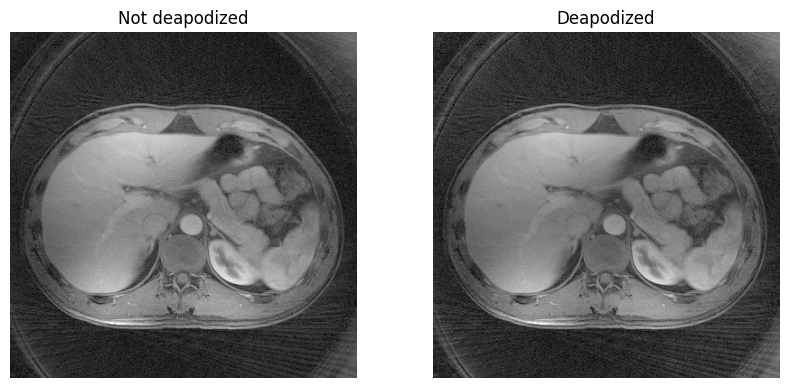

In [ ]:
# Task 5.	De-apodization
k_cart_ds_os_recon_deapod_cropped = op.deapodization(k_radial, traj, 2)
utils.imshow(
    [k_cart_ds_os_recon_cropped, k_cart_ds_os_recon_deapod_cropped], titles=["Not deapodized", "Deapodized"], norm=0.6
)

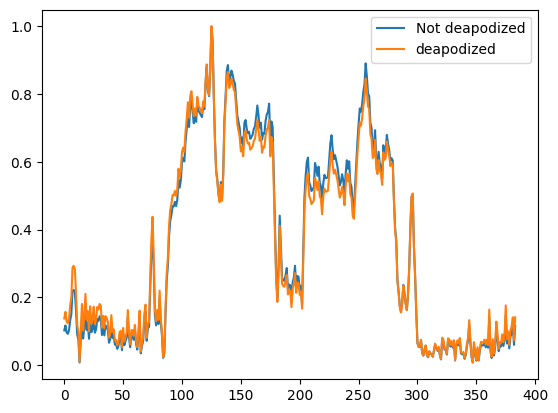

In [ ]:
import matplotlib.pyplot as plt

profile_line = 100

profile_not_deapo = np.abs(k_cart_ds_os_recon_cropped[profile_line, :])
profile_not_deapo /= np.max(profile_not_deapo)

profile_deapo = np.abs(k_cart_ds_os_recon_deapod_cropped[profile_line, :])
profile_deapo /= np.max(profile_deapo)

plt.plot(profile_not_deapo, label="Not deapodized")
plt.plot(profile_deapo, label="deapodized")

plt.legend()
plt.show()

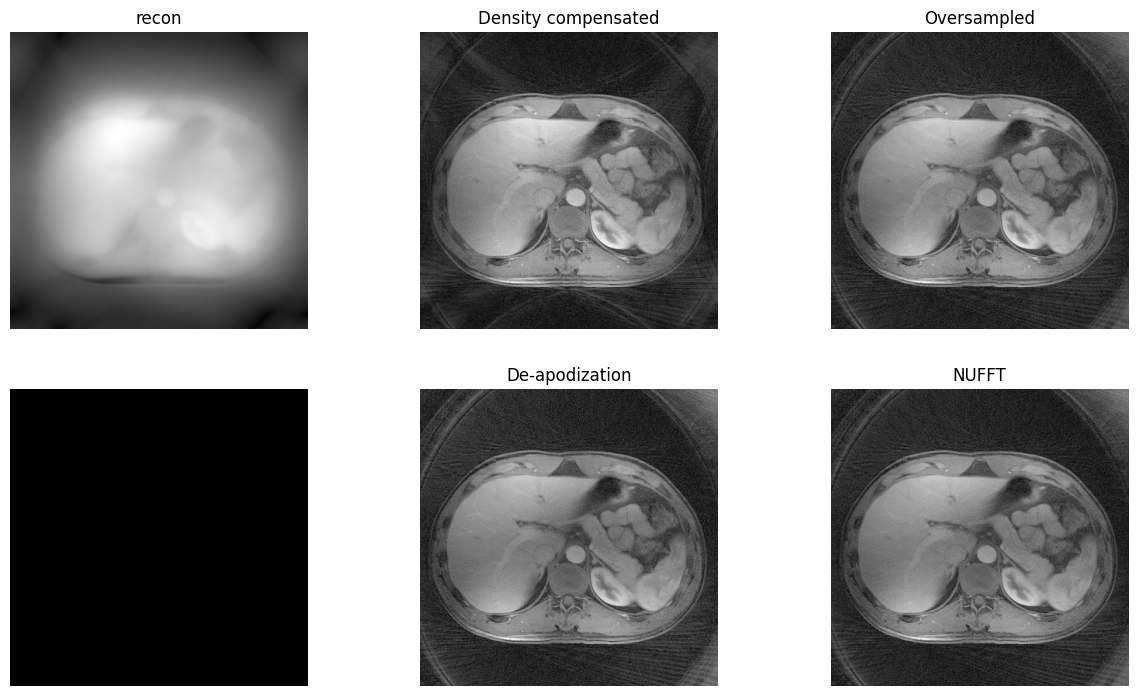

In [ ]:
nufft_recon = op.nufft_recon(k_radial, (k_radial.shape[0], k_radial.shape[0]))
utils.imshow(
    [
        k_cart_recon,
        k_cart_ds_recon,
        k_cart_ds_os_recon_cropped,
        k_cart_ds_os_recon_deapod_cropped,
        nufft_recon,
    ],
    titles=[
        "recon",
        "Density compensated",
        "Oversampled",
        "De-apodization",
        "NUFFT",
    ],
    num_rows=2,
    pos=[1, 1, 1, 0, 1, 1],
    norm=0.6,
)